<h1> Checkpoint:</h1>

**Looking to see completetion and effort in completing the checkpoint. It's okay if it's not correct**

Based off this dataset with school financial, enrollment, and achievement data, we are interested in what information is a useful indicator of student performance at the state level.

This question is a bit too big for a checkpoint, however. Instead, we want you to look at smaller questions related to our overall goal. Here's the overview:

1. Choose a specific test to focus on
>Math/Reading for 4/8 grade
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create 2 well-labeled visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Pick if you want to do a regression or classification task. For both cases, defined _exactly_ what you want to predict, and pick any model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a> and <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">classifiers</a>).
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

** Include comments throughout your code! Every cleanup and preprocessing task should be documented.


Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import numpy, pandas, matplotlib, and seaborn

(Feel free to import other libraries!)

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [2]:
df = pd.read_csv('../data/states_edu.csv')

You should always familiarize yourself with what each column in the dataframe represents. \ Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [3]:
#Renames the columns to more understandable names
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)

#Removes the rows in the df with missing values  
df = df.dropna()

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: **<Math 4 grade>**   (Ex. Math for 4th grade)

**(hit `Enter` to edit)**

Outcome Score in the questions refers to the outcome variable you chose here.

How many different years of data are in our dataset? Use a pandas function.

In [4]:
df.YEAR.unique()

array([2003, 2005, 2007, 2009, 2011, 2013, 2015], dtype=int64)

Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [5]:
mich = df[df['STATE'].str.contains('MICHIGAN')]
ohio = df[df['STATE'].str.contains('OHIO')]
diff = mich["AVG_MATH_4_SCORE"].mean() - ohio["AVG_MATH_4_SCORE"].mean()
if diff > 0:
    print("Michigan has higher 4th Grade Math Scores across all years")
if diff < 0:
    print("Ohio has higher 4th Grade Math Scores across all years")
print("Michigan: ")
print(mich["AVG_MATH_4_SCORE"].mean())
print("Ohio: ")
print(ohio["AVG_MATH_4_SCORE"].mean())

Ohio has higher 4th Grade Math Scores across all years
Michigan: 
236.71428571428572
Ohio: 
243.28571428571428


Find the average for your outcome score across all states in 2019

In [6]:
print("Overall average 4th Grade Math Scores across all years and all states: ")
print(df["AVG_MATH_4_SCORE"].mean())

Overall average 4th Grade Math Scores across all years and all states: 
238.93521126760564


Find the maximum outcome score for every state. Hint: there's a function that allows you to do this easily

In [7]:
print("Max scores for every State")
print(df.groupby('STATE').AVG_MATH_4_SCORE.max())

Max scores for every State
STATE
ALABAMA                 233.0
ALASKA                  237.0
ARIZONA                 240.0
ARKANSAS                240.0
CALIFORNIA              234.0
COLORADO                247.0
CONNECTICUT             245.0
DELAWARE                243.0
DISTRICT_OF_COLUMBIA    231.0
FLORIDA                 243.0
GEORGIA                 240.0
HAWAII                  243.0
IDAHO                   242.0
ILLINOIS                239.0
INDIANA                 249.0
IOWA                    246.0
KANSAS                  248.0
KENTUCKY                242.0
LOUISIANA               234.0
MAINE                   246.0
MARYLAND                247.0
MASSACHUSETTS           253.0
MICHIGAN                238.0
MINNESOTA               253.0
MISSISSIPPI             234.0
MISSOURI                241.0
MONTANA                 244.0
NEBRASKA                244.0
NEVADA                  237.0
NEW_HAMPSHIRE           253.0
NEW_JERSEY              249.0
NEW_MEXICO              233.0
NEW_YOR

<h2> Feature Selection </h2>

After exploring the data, you now have to choose features that you would use to predict the performance of the students on a chosen test (chosen outcome variable). By the way, you can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features

In [8]:
df['PERC_STATE_FUNDED'] = df['STATE_REVENUE'] / df['TOTAL_REVENUE']

Final feature list:

Percentange of School's Revenue comes from State

4th Grade Math Scores

Feature selection justification: 

I wanted to see if there was a positive connection between the state prioritization of its funds to education and average grade 4 math scores. I believed that since the state is putting more of its own resources into education, then it should have greater scores. 

<h2>Visualization</h2>

Use any graph you wish to see the relationship of your chosen outcome variable with any features you chose

**Visualization 1**

Text(0.5, 1.0, "School's revenue coming from state compared to Average 4th grade Math scores")

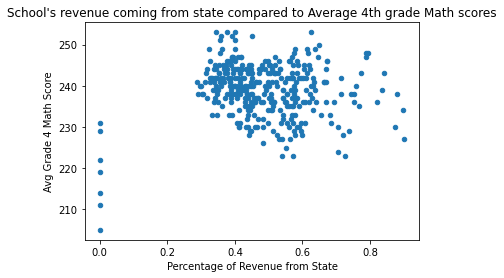

In [9]:
df.plot.scatter(x='PERC_STATE_FUNDED',y='AVG_MATH_4_SCORE')
plt.xlabel('Percentage of Revenue from State')
plt.ylabel('Avg Grade 4 Math Score')
plt.title('School\'s revenue coming from state compared to Average 4th grade Math scores')

See above for a graph showing the trends for percentage of education revenue coming from state money compared to average grade 4 math scores. The graph includes data from every other year from 2003 to 2015.

**Visualization 2**

Text(0.5, 1.0, "Distribution of School's revenue coming from state")

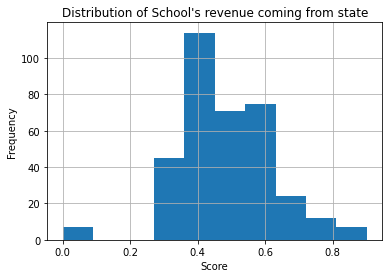

In [10]:
df.PERC_STATE_FUNDED.hist()
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Distribution of School\'s revenue coming from state')

See above for a hisogtam of percent of education revenue recieved from the state itself. The graph includes data from every other year from 2003 to 2015.

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X = df[['ENROLL_ALL_EST','AVG_READING_8_SCORE','YEAR']].dropna()
y = df.loc[X.index]['STATE_REVENUE']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=.3, random_state=0)

<h2> Prediction </h2>

ML Models Resource: https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a

Chosen ML task: **Regression**

In [14]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [15]:
# create your model here
model = LinearRegression()


In [16]:
model.fit(X_train, y_train)

LinearRegression()

In [17]:
y_pred = model.predict(X_test)

In [18]:
# FOR CLASSIFICATION ONLY:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_test, y_test,
                         cmap=plt.cm.Blues)

ValueError: plot_confusion_matrix only supports classifiers

Text(0, 0.5, 'State Revenue')

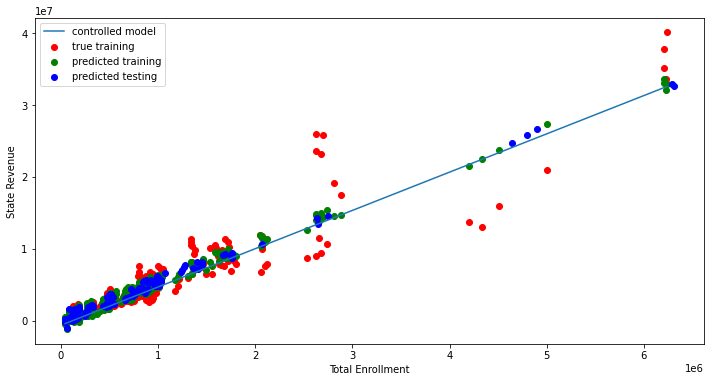

In [21]:
# FOR REGRESSION ONLY: (pick a single column to visualize results)

# Results from this graph _should not_ be used as a part of your results -- it is just here to help with intuition. 
# Instead, look at the error values and individual intercepts.


col_name = 'ENROLL_ALL_EST'
col_index = X_train.columns.get_loc(col_name)

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")
plt.scatter(X_test[col_name], model.predict(X_test), color = "blue")

new_x = np.linspace(X_train[col_name].min(),X_train[col_name].max(),200)
intercept = model.predict([X_train.sort_values(col_name).iloc[0]]) - X_train[col_name].min()*model.coef_[col_index]
plt.plot(new_x, intercept+new_x*model.coef_[col_index])

plt.legend(['controlled model','true training','predicted training','predicted testing'])
plt.xlabel('Total Enrollment')
plt.ylabel('State Revenue')

<h2> Summary </h2>

Above it is seen that since as overall k-12 Enrollment increases so does the state funding for that school. This is a promising sign that every child is getting the same amount of money spent on them regardless of the size of the school district. According to this regression model regardless of size of school the state is funding every school on the basis of enrollment rather than as a flat rate.